# Import Data

In [41]:
#import DataFetcher class from file heart_data.py
import DataFetcher #importing the file DataFetcher.py from the folder data
data_fetcher = DataFetcher.DataFetcher("C:\\Users\\kruth\\OneDrive\\Desktop\\Cardiac_Events_ML\\preprocessing\\final_dataset.csv")
X_train = data_fetcher.get_X_train()
X_test = data_fetcher.get_X_test()
y_train = data_fetcher.get_y_train()
y_test = data_fetcher.get_y_test()
features = data_fetcher.get_features()
target_names = data_fetcher.get_target_names()
X = data_fetcher.get_X()
y = data_fetcher.get_y()

# Get Model Report

In [42]:
# write the function to get any model from joblib and print the accuracy score and classification report
def get_model_report(model_name):
    import joblib
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    model = joblib.load(model_name)
    y_pred = model.predict(X_test)
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))
    print("Classification Report: \n", classification_report(y_test, y_pred, target_names=target_names))
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
    return model

# ROC Combined

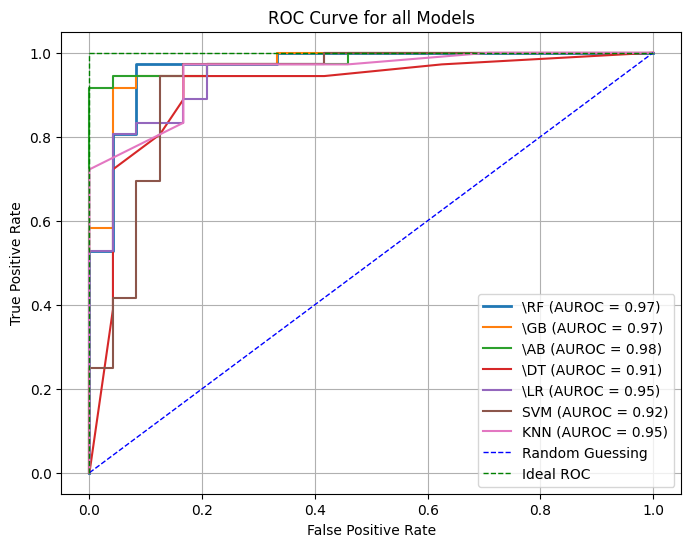

In [43]:
#plot roc curve for the model
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import joblib

plt.figure(figsize=(8,6))
#plot the roc curve for all models
for model_name in ['joblib_dump\RF.pkl', 'joblib_dump\GB.pkl', 'joblib_dump\AB.pkl', 'joblib_dump\DT.pkl', 'joblib_dump\LR.pkl', 'joblib_dump\SVM.pkl', 'joblib_dump\KNN.pkl']:
    model = joblib.load(model_name)
    if model_name == 'joblib_dump\KNN.pkl' or model_name == 'joblib_dump\SVM.pkl' or model_name == 'joblib_dump\LR.pkl':
        #scaling the data for KNN, SVM and Logistic Regression
        from sklearn.preprocessing import StandardScaler 
        scaler = StandardScaler() 
        scaler.fit(X_train) #fitting the scaler to the training set.
        X_train = scaler.transform(X_train) #transforming the training set. 
        X_test = scaler.transform(X_test) #transforming the testing set.
        y_pred_proba = model.predict_proba(X_test)[::,1] #get the probability of the positive class. [::,1] means get the second column of the array
        fpr, tpr, _ = roc_curve(y_test,  y_pred_proba) # _ is a placeholder for the threshold values
        auc = roc_auc_score(y_test, y_pred_proba).round(2) #round the auc score to 2 decimal places
        plt.plot(fpr,tpr, label=(str(model_name[-7:-4])+" (AUROC = %0.2f)") % auc, linewidth = 1.5)
    else:
        y_pred_proba = model.predict_proba(X_test)[::,1] #get the probability of the positive class. [::,1] means get the second column of the array
        fpr, tpr, _ = roc_curve(y_test,  y_pred_proba) # _ is a placeholder for the threshold values
        auc = roc_auc_score(y_test, y_pred_proba).round(2) #round the auc score to 2 decimal places
        if model_name == 'joblib_dump\RF.pkl':
            linewidth = 2
        else:
            linewidth = 1.5
        plt.plot(fpr,tpr, label=(str(model_name[-7:-4])+" (AUROC = %0.2f)") % auc, linewidth = linewidth)


#plot the random guessing line and the ideal roc line
plt.plot([0,1],[0,1],"b--", linewidth = 1, label = "Random Guessing")
plt.plot([0,1],[1,1], "g--", linewidth = 1, label = "Ideal ROC")
plt.plot([0,0],[0,1], "g--", linewidth = 1)

#set up the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for all Models")
plt.legend(loc="best")
plt.grid(True)
plt.show()


# Models without Feature Scaling

## Random Forest

In [44]:
get_model_report('joblib_dump\RF.pkl')

Accuracy Score:  0.8166666666666667
Classification Report: 
               precision    recall  f1-score   support

    diseased       0.74      0.83      0.78        24
non_diseased       0.88      0.81      0.84        36

    accuracy                           0.82        60
   macro avg       0.81      0.82      0.81        60
weighted avg       0.82      0.82      0.82        60

Confusion Matrix: 
 [[20  4]
 [ 7 29]]


RandomForestClassifier(max_depth=2, min_samples_leaf=8, min_samples_split=4,
                       n_estimators=1000, random_state=42)

## Gradient Boosting

In [45]:
get_model_report('joblib_dump\GB.pkl')

Accuracy Score:  0.8
Classification Report: 
               precision    recall  f1-score   support

    diseased       0.88      0.58      0.70        24
non_diseased       0.77      0.94      0.85        36

    accuracy                           0.80        60
   macro avg       0.82      0.76      0.78        60
weighted avg       0.81      0.80      0.79        60

Confusion Matrix: 
 [[14 10]
 [ 2 34]]


GradientBoostingClassifier(learning_rate=0.01, max_depth=1, max_features='sqrt',
                           random_state=42, subsample=0.5)

##  AdaBoost

In [46]:
get_model_report('joblib_dump\AB.pkl')

Accuracy Score:  0.8
Classification Report: 
               precision    recall  f1-score   support

    diseased       0.88      0.58      0.70        24
non_diseased       0.77      0.94      0.85        36

    accuracy                           0.80        60
   macro avg       0.82      0.76      0.78        60
weighted avg       0.81      0.80      0.79        60

Confusion Matrix: 
 [[14 10]
 [ 2 34]]


AdaBoostClassifier(learning_rate=0.01, n_estimators=600, random_state=42)

## Decision Tree

In [47]:
get_model_report('joblib_dump\DT.pkl')

Accuracy Score:  0.8166666666666667
Classification Report: 
               precision    recall  f1-score   support

    diseased       0.88      0.62      0.73        24
non_diseased       0.79      0.94      0.86        36

    accuracy                           0.82        60
   macro avg       0.84      0.78      0.80        60
weighted avg       0.83      0.82      0.81        60

Confusion Matrix: 
 [[15  9]
 [ 2 34]]


DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=20,
                       random_state=42)

# Models with Feature Scaling

## Features Scaling

In [48]:
#scaling the feature dataset:
from sklearn.preprocessing import StandardScaler 
#formula for scaling: x_scaled = (x - mean)/std_deviation
# fit the Scaler
scaler = StandardScaler() #creating an instance of the StandardScaler class.
#Scaling the values such that the mean is 0 and std deviation is 1.
scaler.fit(X_train) #fitting the scaler to the training set.
X_train = scaler.transform(X_train) #transforming the training set. 
X_test = scaler.transform(X_test) #transforming the testing set.

## Logistic Regression

In [49]:
get_model_report('joblib_dump\LR.pkl')

Accuracy Score:  0.9
Classification Report: 
               precision    recall  f1-score   support

    diseased       0.95      0.79      0.86        24
non_diseased       0.88      0.97      0.92        36

    accuracy                           0.90        60
   macro avg       0.91      0.88      0.89        60
weighted avg       0.90      0.90      0.90        60

Confusion Matrix: 
 [[19  5]
 [ 1 35]]


LogisticRegression(C=0.01, random_state=42, solver='liblinear')

## Support Vector Machine

In [50]:
get_model_report('joblib_dump\SVM.pkl')

Accuracy Score:  0.9166666666666666
Classification Report: 
               precision    recall  f1-score   support

    diseased       0.95      0.83      0.89        24
non_diseased       0.90      0.97      0.93        36

    accuracy                           0.92        60
   macro avg       0.92      0.90      0.91        60
weighted avg       0.92      0.92      0.92        60

Confusion Matrix: 
 [[20  4]
 [ 1 35]]


SVC(C=1.1, gamma='auto', kernel='linear', probability=True, random_state=42)

## K-Nearest Neighbors

In [51]:
get_model_report("joblib_dump\KNN.pkl")

Accuracy Score:  0.9166666666666666
Classification Report: 
               precision    recall  f1-score   support

    diseased       0.95      0.83      0.89        24
non_diseased       0.90      0.97      0.93        36

    accuracy                           0.92        60
   macro avg       0.92      0.90      0.91        60
weighted avg       0.92      0.92      0.92        60

Confusion Matrix: 
 [[20  4]
 [ 1 35]]


KNeighborsClassifier(algorithm='ball_tree', leaf_size=2, n_neighbors=9)